# Name - Vikram kumar 
# Task 3 - Exploratory Data Analysis (Retail)
# Dataset - SampleSuperstore.csv
Importing the necessary libraries

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# Loading dataset

In [2]:
df=pd.read_csv('Downloads\SampleSuperstore.csv')
df.head(15) #Display the first 15 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


# Exploratory Data Analysis(EDA)

In [3]:
#row and column count of data
df.shape

(9994, 13)

In [4]:
#column names of table
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
#check data type of columns/attributes
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

##
We can see that there are no null/missing values in the data. Let's start exploring our data

In [7]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

##The above data shows that 'United States' is present in every row under the column 'Country'. So, clearly the data is based on United States's Superstore sales. So, let's drop the 'Country' column from the data

In [8]:

#dropping Country column
df=df.drop('Country',axis=1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


##Now, we can analyse the data from two different perspectives:

Product Level Analysis
Region Level Analysis

##
Let's have a look at the 'Categories' given in the data for the customers to shop from

In [9]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [10]:
#number of products in each category 
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [11]:
#number of Sub-categories products are divided.
df['Sub-Category'].nunique()

17

In [12]:
#number of products in each sub-category
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

##Now, let's visualize the sub-categories that are distributed under the 'Categories' using a bar chart

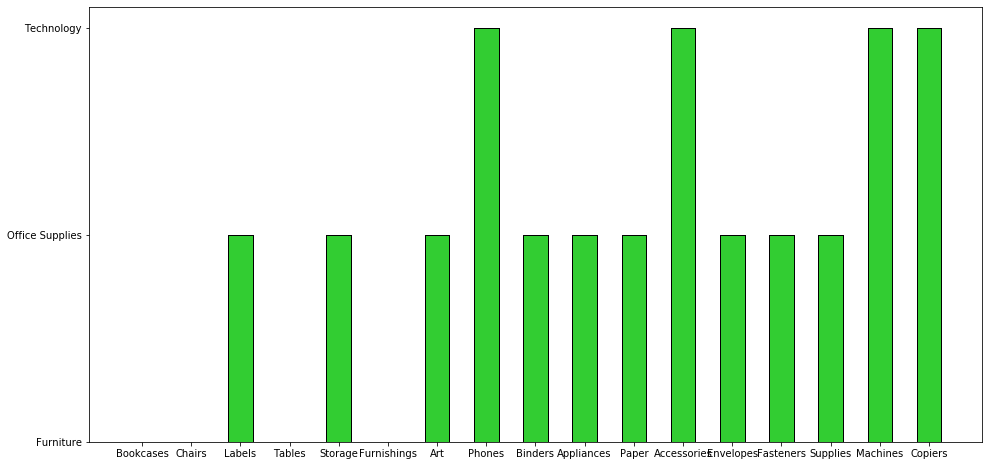

In [13]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='limegreen',edgecolor = 'black', width = 0.5)
plt.show()

##
Looking at the bar chart, one can understand from which Category and/or Sub-Category to buy from

Let's have a clearer picture of the Sub-Categories by visualizing the products in a 'Pie-Chart'

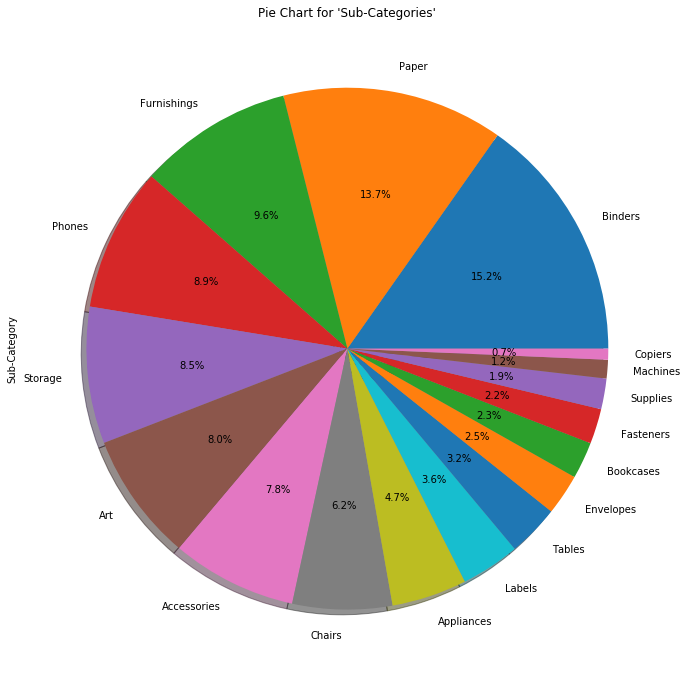

In [14]:

plt.figure(figsize=(14,12))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%", shadow = True)
plt.title("Pie Chart for 'Sub-Categories'") 
#Show plot
plt.show()

##from the chart, we can see that the 'SuperStore' has a wide variety of 'Papers'and 'Binders', whereas 'Copiers' and 'Machines' are the least stocked.

Now we shall check the Total Profit of the sales per Sub-Category

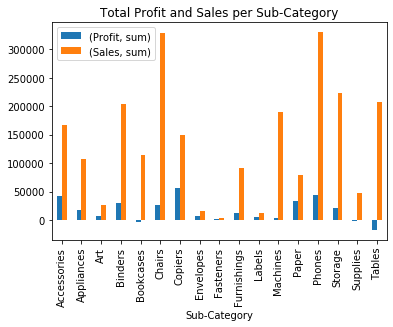

In [15]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.legend()
plt.show()

##we have the Maximum Profit for 'Copiers', 'Paper' and 'Accessories'.

We have maximum sales for 'Chairs' and 'Phones' but 'Tables' and 'Bookcases' departments are facing loss

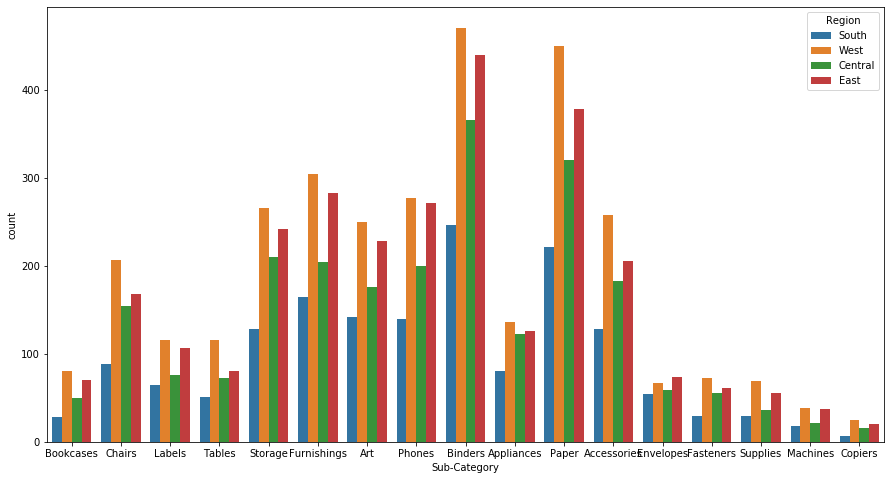

In [16]:

#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

##Hence, people from the western region (Region = 'West') are buying more from the superstore whereas people from Central region are ordering the least products from superstore

In [17]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [18]:
df['Profit %']=(df['Profit']/df['Cost'])*100

In [19]:
#Profit Percentage of first 5 product names
df.iloc[[0,1,2,3,4],[12,13]]

,Cost,Profit %
0,220.0464,19.047619
1,512.3580,42.857143
2,7.7486,88.679245
3,1340.6085,-28.571429
4,19.8516,12.676056


In [20]:
#Products with high Profit Percentage 
df.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


##Retailers selling 'Phones' and 'Paper' have a 100% profit, whereas 'Appliances' department are facing the highest percentage of loss in their business

Also we can see that the business in the Central Region of United States have been showing poor business

In [21]:

!jupyter nbextension enable --py jupyter_dashboards --sys-prefix

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbextension-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\notebook\nbextensions.py", line 983, in start
    super(NBExtensionApp, self).start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 257, in start
    self.subapp.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\notebook\nbextensions.py", line 891, in start
    self.toggle_nbextension_python(self.extra_args[0])
  File "C:\ProgramData\Anaconda3\lib\site-packages\notebook\nbextensions.py", line 867, in toggle_nbextension_python
    logge

##First let's have a look at the 'Segment' distribution

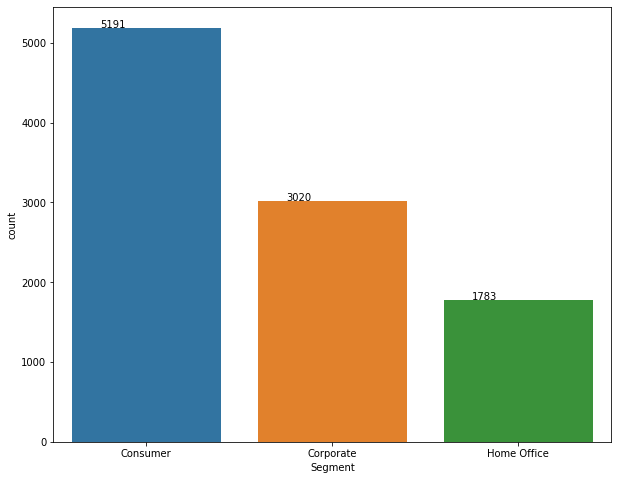

In [22]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = df)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()


## the distribution is highest in 'Consumer' segment

In [23]:
#Regions with high Profit Percentage 
df.sort_values(['Profit %','Region'],ascending=False).groupby('Profit %').head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
322,Standard Class,Corporate,Long Beach,California,90805,West,Office Supplies,Fasteners,7.160,2,0.0,3.5800,3.5800,100.000000
381,First Class,Corporate,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
484,First Class,Home Office,Los Angeles,California,90045,West,Office Supplies,Labels,29.600,2,0.0,14.8000,14.8000,100.000000
720,Standard Class,Home Office,Los Angeles,California,90045,West,Office Supplies,Paper,146.820,3,0.0,73.4100,73.4100,100.000000
962,First Class,Corporate,San Francisco,California,94110,West,Office Supplies,Envelopes,21.880,2,0.0,10.9400,10.9400,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


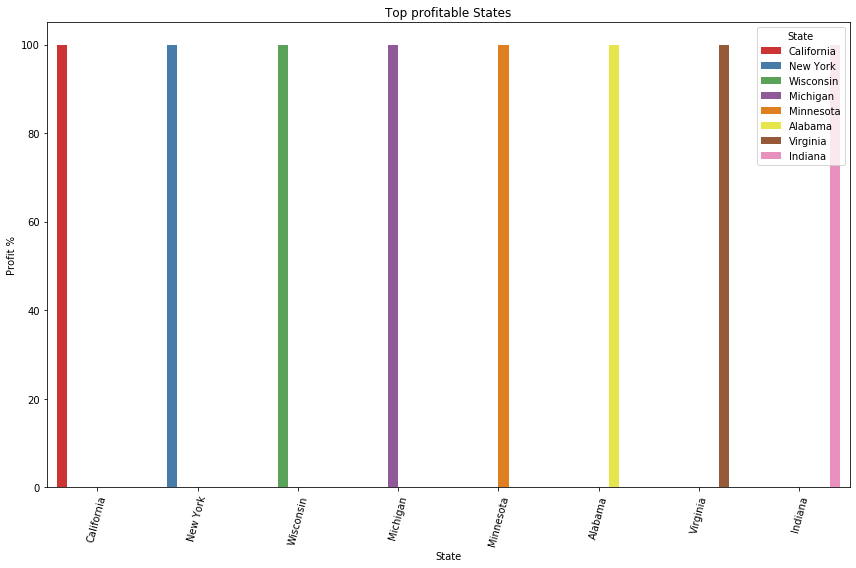

In [24]:
#Top States from which the store benefitted
sortedTop20 = df.sort_values(['Profit %'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='State', y='Profit %',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top profitable States")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

##
From the barplot, we can analyse that none of the most profitable states lie in the Central Region of US. The graph corresponds to the previous table which is sorted according to 'Region' and 'Profit %'

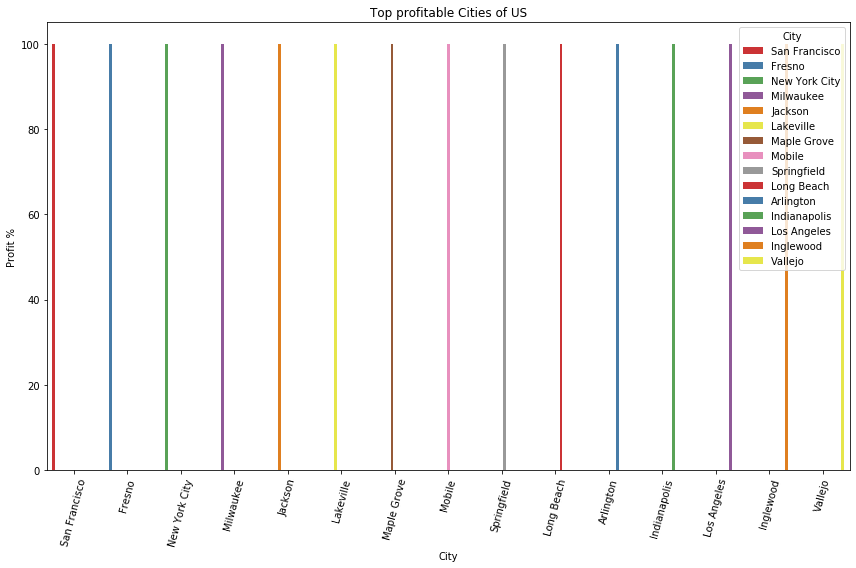

In [25]:
#Top Cities who benefitted the store
sortedTop20 = df.sort_values(['Profit %'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='City', y='Profit %',hue='City',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top profitable Cities of US")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()


##Here, the barplot again corresponds to the previous graph and table. Therefore, the most profitable states lie on the East Region and the most non-profitable states lies in the Central (South-East and South) region.